# Intro to Networkx

## Подготoвка

In [ ]:
!pip3 install networkx

In [7]:
# imports

import networkx as nx
import pandas as pd
import string

from nltk.stem import WordNetLemmatizer
import nltk
# import ssl
# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context
# nltk.download('wordnet')
# nltk.download('omw-1.4')
 
lemmatizer = WordNetLemmatizer()

import itertools
import matplotlib.pyplot as plt
import re

In [3]:
data = pd.read_csv("../data/indian_food.csv") # пропишите здесь корректный путь
data.shape

(255, 9)

In [4]:
data.head(3)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North


In [5]:
data.ingredients

0                        Maida flour, yogurt, oil, sugar
1                                Gram flour, ghee, sugar
2           Carrots, milk, sugar, ghee, cashews, raisins
3      Flour, ghee, kewra, milk, clarified butter, su...
4      Milk powder, plain flour, baking powder, ghee,...
                             ...                        
250              Glutinous rice, black sesame seeds, gur
251    Coconut milk, egg yolks, clarified butter, all...
252    Cottage cheese, dry dates, dried rose petals, ...
253    Milk powder, dry fruits, arrowroot powder, all...
254    Brown rice, fennel seeds, grated coconut, blac...
Name: ingredients, Length: 255, dtype: object

In [8]:
data.ingredients = data.ingredients.apply(
 lambda x: re.sub("[\d,.]","",x).lower().split()
    )

data.ingredients

0                     [maida, flour, yogurt, oil, sugar]
1                             [gram, flour, ghee, sugar]
2         [carrots, milk, sugar, ghee, cashews, raisins]
3      [flour, ghee, kewra, milk, clarified, butter, ...
4      [milk, powder, plain, flour, baking, powder, g...
                             ...                        
250         [glutinous, rice, black, sesame, seeds, gur]
251    [coconut, milk, egg, yolks, clarified, butter,...
252    [cottage, cheese, dry, dates, dried, rose, pet...
253    [milk, powder, dry, fruits, arrowroot, powder,...
254    [brown, rice, fennel, seeds, grated, coconut, ...
Name: ingredients, Length: 255, dtype: object

In [10]:
# уникальные ингридиенты
tmp = data.ingredients.to_list()
tmp

total = set()
for x in tmp:
    total.update(x)
    
len(total)

337

In [20]:
with open ("../data/indian_ingredients.txt", "r") as file:
    clean = file.read()
    clean = re.sub("[\}\'\"\{,]","",clean).lower().split()
    
len(clean)

241

In [24]:
clean[:5]

['amaranth', 'amchur', 'anise', 'apricots', 'arbi']

## Самое время создать граф

In [68]:
G = nx.Graph()

In [27]:
? G

Type:           Graph
String form:    Graph with 0 nodes and 0 edges
Length:         0
File:           /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/networkx/classes/graph.py
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, NumPy matrix
    or 2d ndarray, SciPy

[Документация к библиотеке](https://networkx.org/documentation/latest/auto_examples/index.html)

[Быстрый гайд](https://networkx.org/documentation/stable/tutorial.html)

In [69]:
n = 0

for x in data.ingredients[:10]:
    for a, b in itertools.combinations(x, 2):
        if not (G.has_edge(a, b)):
            G.add_edge(a, b)
            n = n + 1

print(G.number_of_nodes(), "nodes, and", G.number_of_edges(), "edges created.")

36 nodes, and 191 edges created.


[Что можно нарисовать](https://networkx.org/documentation/stable/reference/drawing.html)

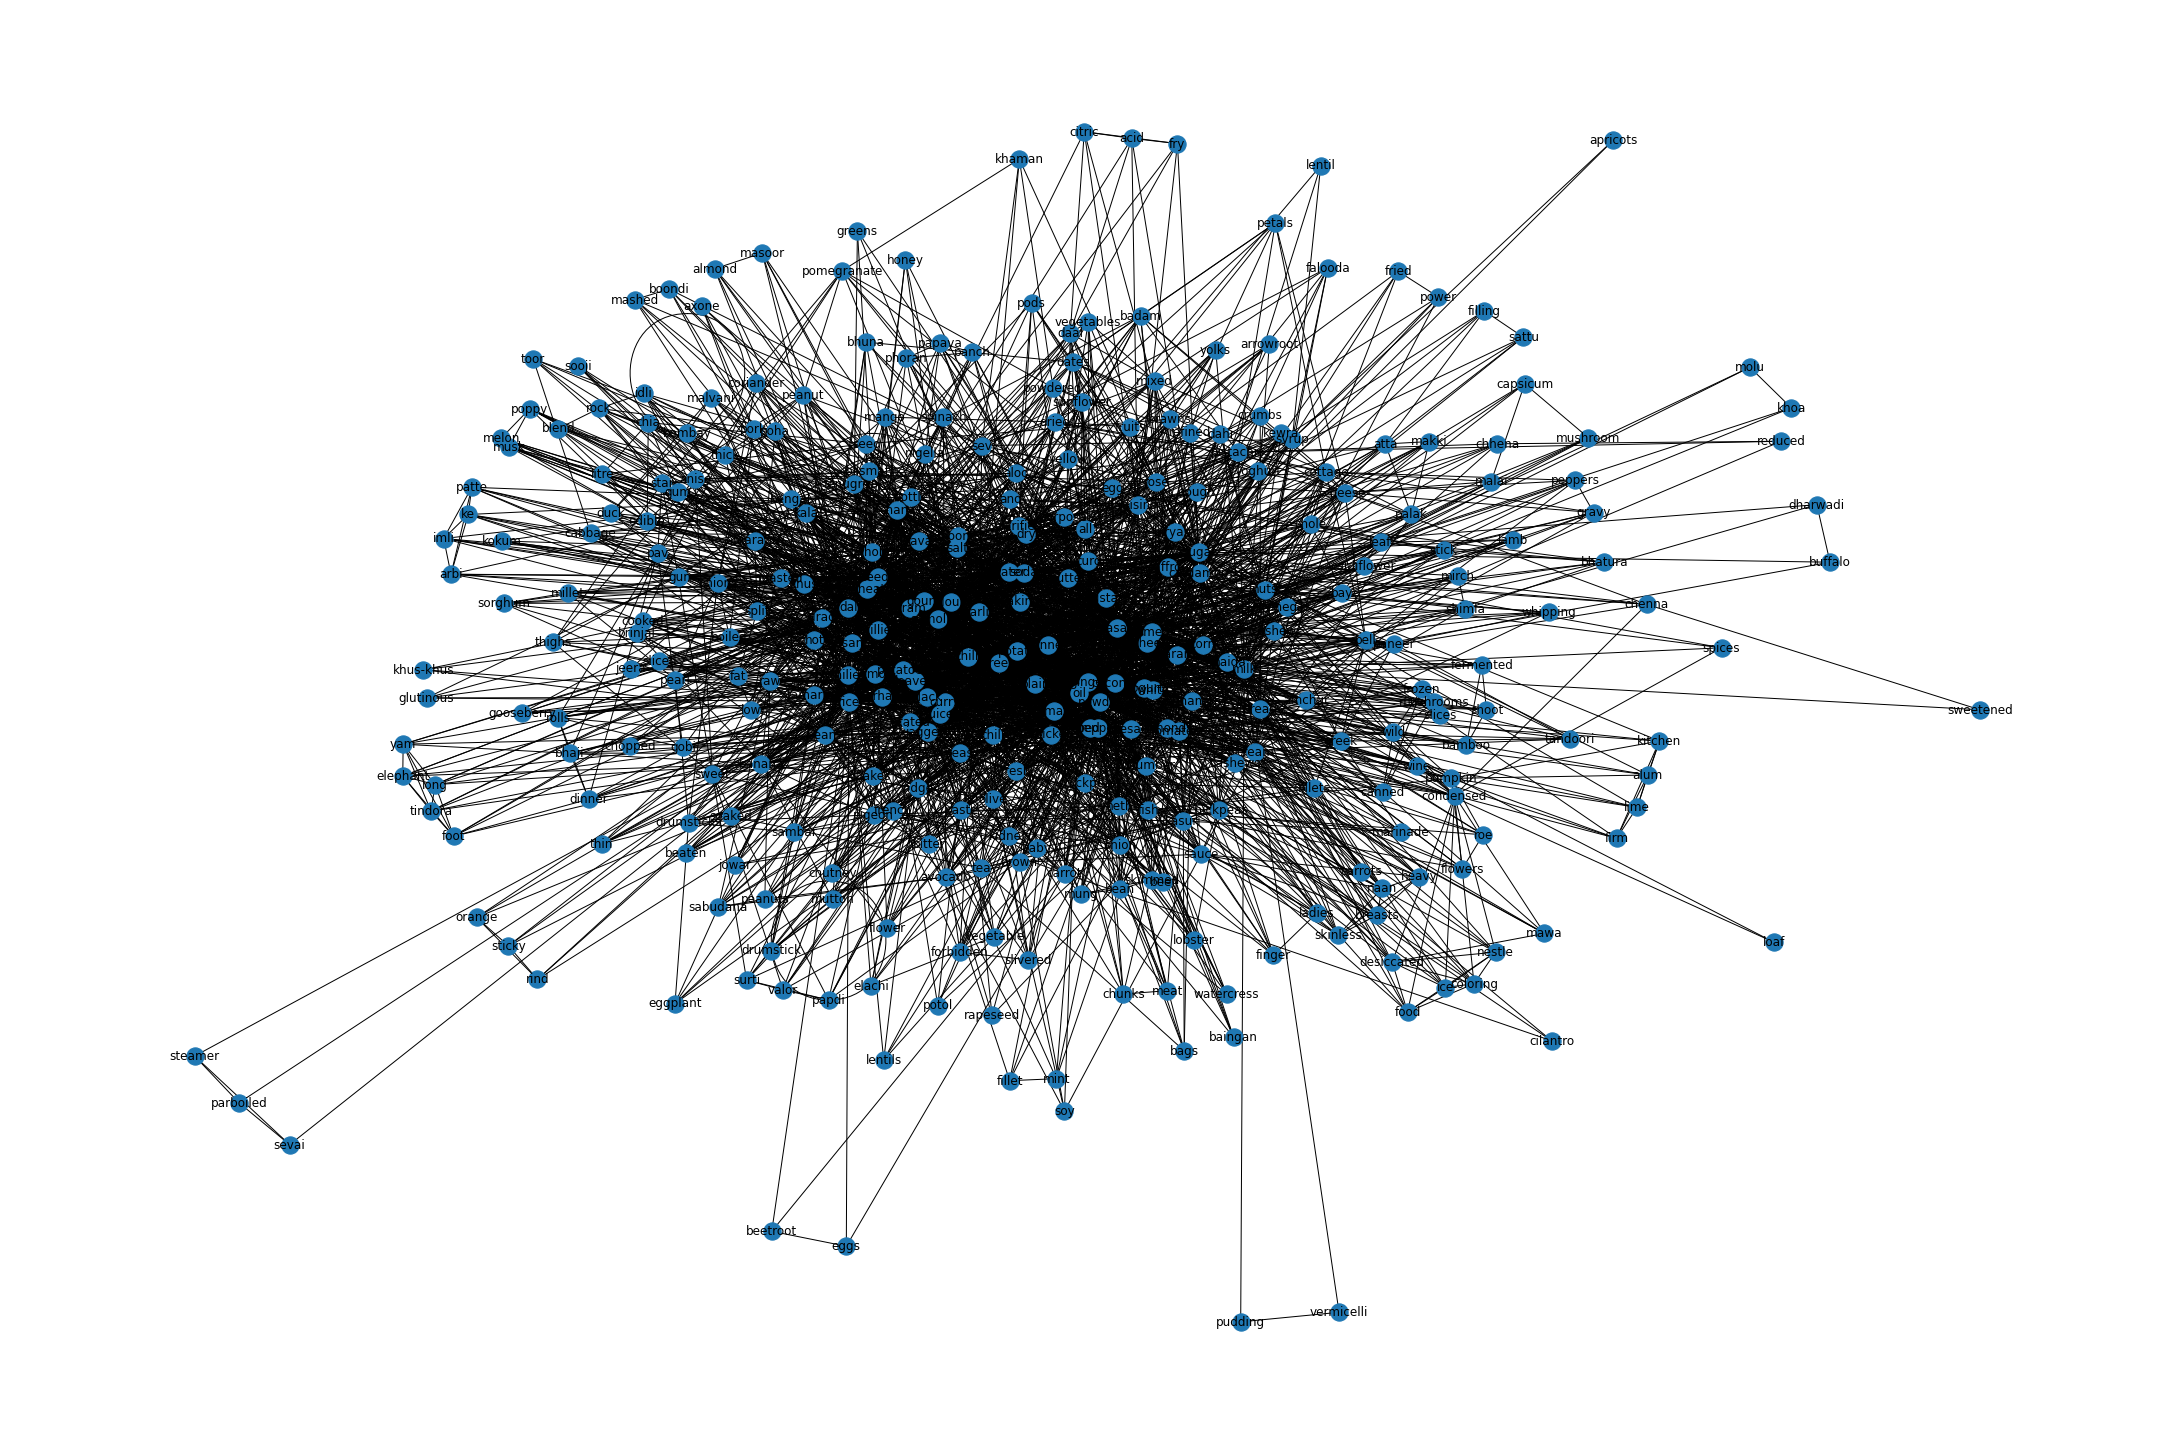

In [52]:
plt.figure(figsize=(30,20))

nx.draw(G, with_labels=True)
plt.draw()

In [70]:
nx.algorithms.cycles.find_cycle(G)

[('maida', 'flour'), ('flour', 'yogurt'), ('yogurt', 'maida')]

In [71]:
G.nodes()

NodeView(('maida', 'flour', 'yogurt', 'oil', 'sugar', 'gram', 'ghee', 'carrots', 'milk', 'cashews', 'raisins', 'kewra', 'clarified', 'butter', 'almonds', 'pistachio', 'saffron', 'green', 'cardamom', 'powder', 'plain', 'baking', 'water', 'rose', 'syrup', 'lentil', 'corn', 'soda', 'vinegar', 'curd', 'turmeric', 'cottage', 'cheese', 'rice', 'dried', 'fruits'))

## Попробуем разные лэйауты:

draw_networkx_nodes(G)

draw_networkx_edges(G)

draw_networkx_labels(G)


draw_circular(G)

draw_kamada_kawai(G)

draw_planar(G)

draw_random(G)

draw_spectral(G)

draw_spring(G)

draw_shell(G)

In [62]:
from networkx.drawing.nx_pylab import (draw_circular,
                                draw_kamada_kawai,
                                draw_planar,
                                draw_random,
                                draw_spectral,
                                draw_spring,
                                draw_shell) 

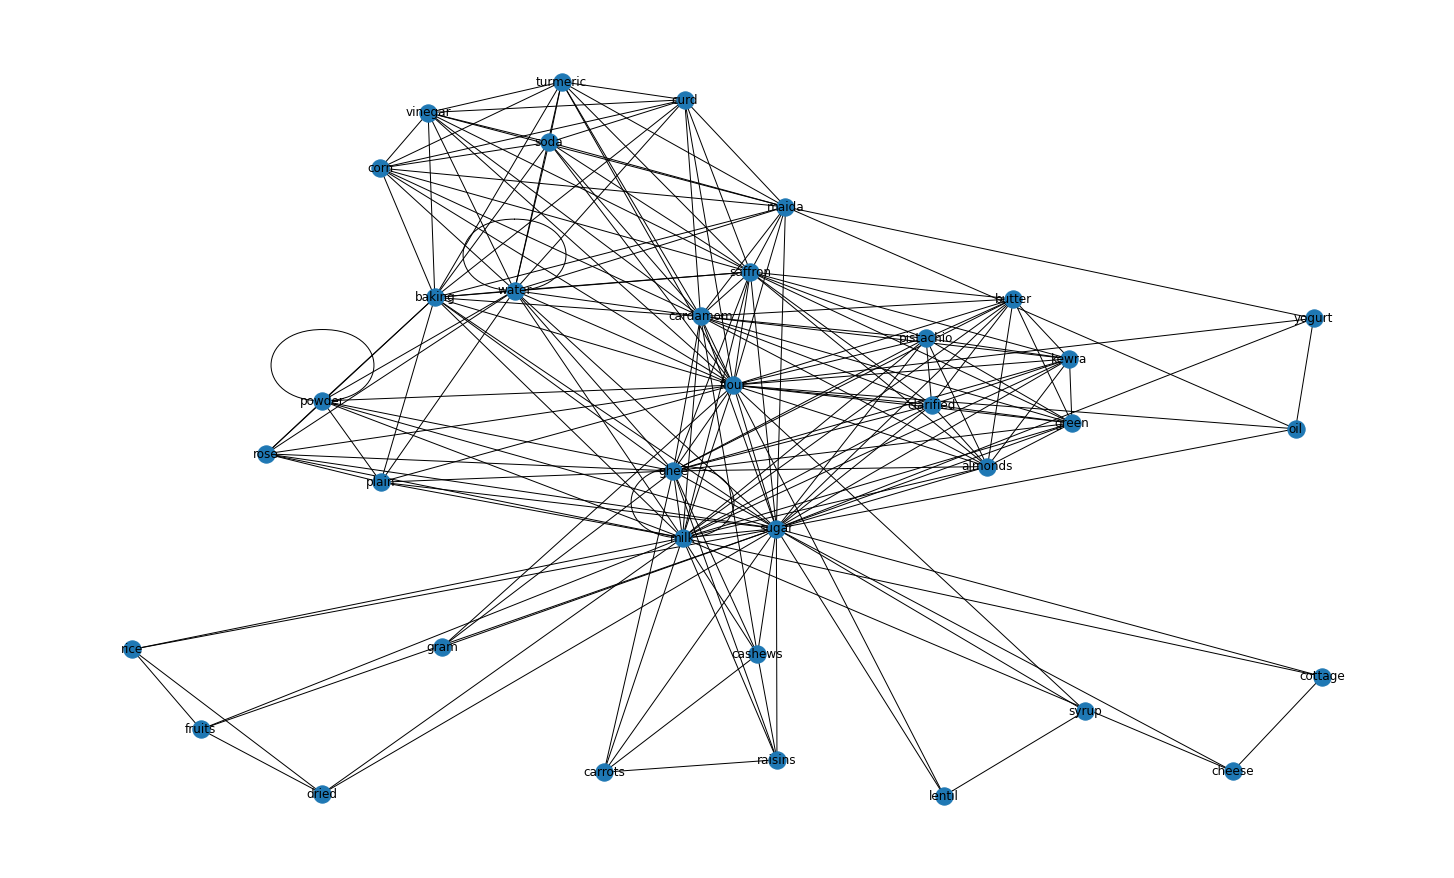

In [101]:
plt.figure(figsize=(20,12))
draw_spring(G, with_labels=True,)

In [105]:
list(nx.algorithms.clique.find_cliques(G))

[['sugar', 'maida', 'flour', 'cardamom', 'water', 'saffron', 'baking'],
 ['sugar', 'maida', 'flour', 'oil', 'yogurt'],
 ['sugar', 'lentil', 'syrup', 'flour'],
 ['sugar', 'gram', 'flour', 'ghee'],
 ['sugar', 'milk', 'ghee', 'flour', 'cardamom', 'saffron', 'water', 'baking'],
 ['sugar',
  'milk',
  'ghee',
  'flour',
  'cardamom',
  'saffron',
  'green',
  'almonds',
  'clarified',
  'pistachio',
  'kewra',
  'butter'],
 ['sugar',
  'milk',
  'ghee',
  'flour',
  'powder',
  'water',
  'rose',
  'plain',
  'baking'],
 ['sugar', 'milk', 'ghee', 'carrots', 'raisins', 'cashews'],
 ['sugar', 'milk', 'ghee', 'cashews', 'cardamom'],
 ['sugar', 'milk', 'fruits', 'dried', 'rice'],
 ['sugar', 'milk', 'cheese', 'cottage'],
 ['corn',
  'maida',
  'cardamom',
  'vinegar',
  'curd',
  'saffron',
  'flour',
  'water',
  'soda',
  'turmeric',
  'baking']]

In [117]:
list(G.neighbors("corn"))

['maida',
 'flour',
 'baking',
 'soda',
 'vinegar',
 'curd',
 'water',
 'turmeric',
 'saffron',
 'cardamom']

In [86]:
def has_self_loop(G: nx.Graph, node):
    try:
        if G[node][node] != None:
            return True
    except Exception:
        return False
    
    
    
print([node for node in G.nodes() if has_self_loop(G, node) == True],"has self loop")

['milk', 'powder', 'water'] has self loop


In [76]:
list(nx.classes.function.selfloop_edges(G))

[('milk', 'milk'), ('powder', 'powder'), ('water', 'water')]

In [118]:
from networkx.algorithms.centrality import (degree_centrality,
                                            eigenvector_centrality,
                                            closeness_centrality,
                                            betweenness_centrality
                                           )

In [140]:
degree_sorted = sorted(degree.items(), key=lambda item: item[1], reverse=True)
degree_sorted[:10]

[('sugar', 0.8571428571428571),
 ('flour', 0.7714285714285714),
 ('milk', 0.7428571428571429),
 ('ghee', 0.5714285714285714),
 ('cardamom', 0.5714285714285714),
 ('saffron', 0.5428571428571428),
 ('water', 0.5142857142857142),
 ('baking', 0.45714285714285713),
 ('maida', 0.37142857142857144),
 ('kewra', 0.3142857142857143)]

In [142]:
eigen = eigenvector_centrality(G)

eigen_sorted = sorted(eigen.items(), key=lambda item: item[1], reverse=True)
eigen_sorted[:10]

[('flour', 0.31065525149508333),
 ('sugar', 0.29339766219540026),
 ('milk', 0.28349623875715807),
 ('cardamom', 0.2729082522852073),
 ('saffron', 0.2672832936653588),
 ('ghee', 0.25420234858225615),
 ('water', 0.23873613227430007),
 ('baking', 0.2231973096338049),
 ('green', 0.17962247507114396),
 ('kewra', 0.17962247507114393)]

In [145]:
closeness = closeness_centrality(G)

closeness_sorted = sorted(closeness.items(), key=lambda item: item[1], reverse=True)
closeness_sorted[:10]

[('sugar', 0.875),
 ('flour', 0.813953488372093),
 ('milk', 0.7608695652173914),
 ('ghee', 0.7),
 ('cardamom', 0.7),
 ('saffron', 0.6862745098039216),
 ('baking', 0.6481481481481481),
 ('water', 0.6481481481481481),
 ('maida', 0.6140350877192983),
 ('kewra', 0.5932203389830508)]

In [146]:
betw = betweenness_centrality(G)

betw_sorted = sorted(betw.items(), key=lambda item: item[1], reverse=True)
betw_sorted[:10]

[('sugar', 0.29033463652840824),
 ('flour', 0.15640363097110496),
 ('milk', 0.13860752857292652),
 ('cardamom', 0.05305052502284335),
 ('ghee', 0.04920085681331355),
 ('saffron', 0.03861651612516664),
 ('baking', 0.027271978310040596),
 ('water', 0.027271978310040596),
 ('maida', 0.019094054734193136),
 ('cashews', 0.0018289668808699954)]